# Appendix B: Level 1 Filters

#### After loading the data we apply four "Level 1" filters" detailed below:

* `“Identical Except Price” Filter:` The OptionMetrics data set contain duplicate observations, defined as two or more quotes with identical option type, strike, expiration date, and price. In each such case, we eliminate all but one of the quotes.

* `“Identical Except Price” Filter:` There are a few sets of quotes with identical terms (type, strike, and maturity) but different prices. When this occurs, we
keep the quote whose T-bill-based implied volatility is closest to that of its moneyness neighbors, and delete the others. 

* `“Bid = 0” Filter:` We remove quotes of zero for bids, thereby avoiding lowvalued options. Also, a zero bid may indicate censoring as negative bids cannot be recorded.

* `“Volume = 0” Filter:` We remove quotes of zero for volumes, thereby avoiding lowtraded options. 



In [1]:
import sys
sys.path.insert(1, './../src/')

import pandas as pd
import numpy as np
import config
from pathlib import Path 
import time 
import seaborn as sns
import matplotlib.pyplot as plt

import load_option_data_01 
import filter_option_data_01 as f1

OUTPUT_DIR = Path(config.OUTPUT_DIR)
DATA_DIR = Path(config.DATA_DIR)
WRDS_USERNAME = config.WRDS_USERNAME

START_DATE_01 =config.START_DATE_01
END_DATE_01 = config.END_DATE_01

START_DATE_02 =config.START_DATE_02
END_DATE_02 = config.END_DATE_02

NOTE_START = START_DATE_01
NOTE_END = END_DATE_01

# Level 1 Filters: 

## Load Data

brief description

In [7]:
df_raw = load_option_data_01.load_all_optm_data(data_dir=DATA_DIR,
											wrds_username=WRDS_USERNAME, 
											startDate=NOTE_START,
											endDate=NOTE_END)
df = f1.getSecPrice(df_raw)
df = f1.calc_moneyness(df)

Reading from file: C:\Users\ian\Documents\Python Scripts\FINN\Final\finm-32900_final_project\data\pulled\data_1996-01_2012-01.parquet
Loading Data took 0.44 seconds


In [8]:
df.head()

,secid,date,open,close,cp_flag,exdate,impl_volatility,tb_m3,volume,open_interest,best_bid,best_offer,strike_price,contract_size,sec_price,mnyns
0,108105.0,1996-01-05,617.70,616.71,C,1996-03-16,NaN,0.0503,0.0,6527.0,92.875,93.875,525.0,100.0,616.71,0.851292
1,108105.0,1996-01-05,617.70,616.71,C,1996-03-16,NaN,0.0503,0.0,5101.0,68.750,69.750,550.0,100.0,616.71,0.891829
2,108105.0,1996-01-09,618.46,609.45,C,1996-02-17,NaN,0.0501,0.0,90.0,38.500,39.500,570.0,100.0,609.45,0.935270
3,108105.0,1996-01-09,618.46,609.45,C,1996-01-20,NaN,0.0501,0.0,1004.0,25.625,26.625,580.0,100.0,609.45,0.951678
4,108105.0,1996-01-17,608.44,606.37,C,1996-01-20,NaN,0.0499,80.0,3113.0,10.750,11.250,595.0,100.0,606.37,0.981249


In [6]:
df.keys()

Index(['secid', 'date', 'open', 'close', 'cp_flag', 'exdate',
       'impl_volatility', 'tb_m3', 'volume', 'open_interest', 'best_bid',
       'best_offer', 'strike_price', 'contract_size', 'sec_price', 'log_iv'],
      dtype='object')

## Plot Loaded Data

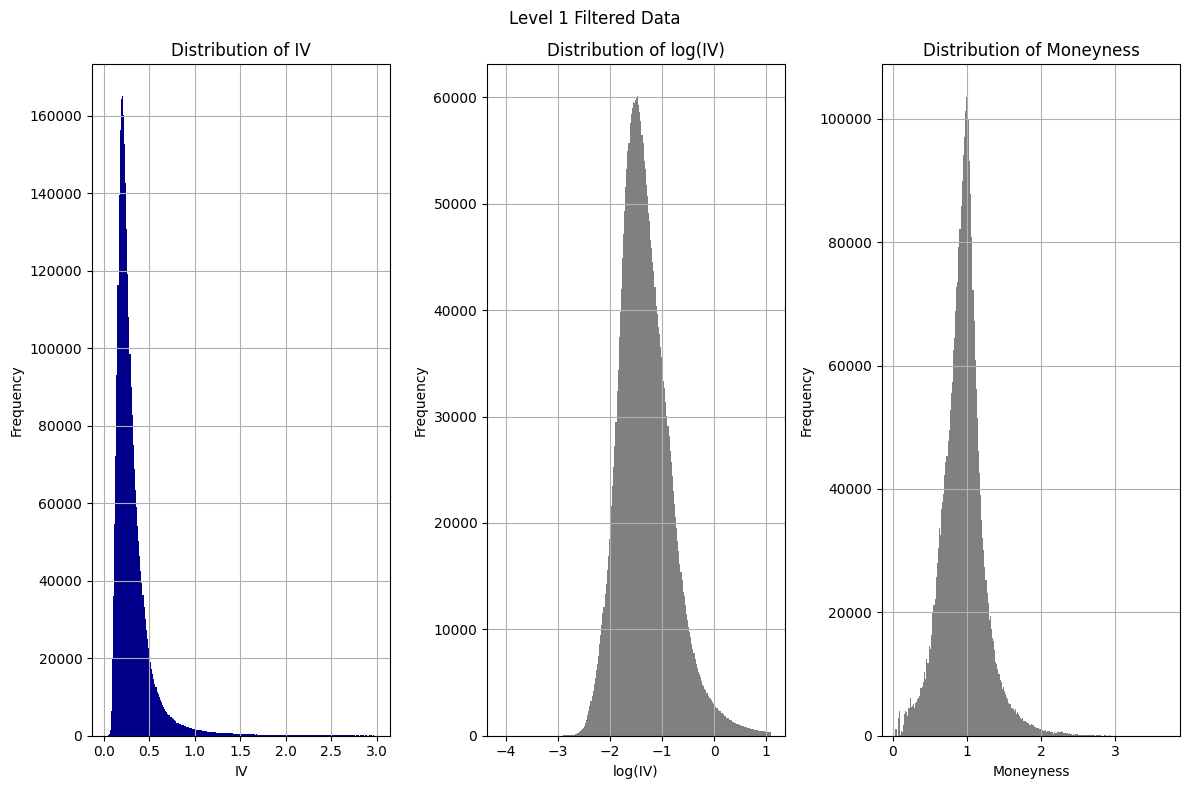

In [10]:

datplot = df
datplot['log_iv'] = np.log(datplot['impl_volatility'])
fig, ax = plt.subplots(1,3, figsize=(12,8))
axes = ax.flatten()

axes[0].hist(datplot['impl_volatility'], bins=250, color='darkblue')
axes[0].set_xlabel('IV')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of IV')
axes[0].grid()

axes[1].hist(datplot['log_iv'], bins=250, color='grey')
axes[1].set_xlabel('log(IV)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of log(IV)')
axes[1].grid()

j = 2
axes[j].hist(datplot['mnyns'], bins=250, color='grey')
axes[j].set_xlabel('Moneyness')
axes[j].set_ylabel('Frequency')
axes[j].set_title('Distribution of Moneyness')
axes[j].grid()



plt.suptitle('Level 1 Filtered Data')
plt.tight_layout()
plt.show()

## Filter Duplicates

brief description

> code python do stuff

In [11]:
df = f1.delete_identical_filter(df)

In [12]:
df.head()

,secid,date,open,close,cp_flag,exdate,impl_volatility,tb_m3,volume,open_interest,best_bid,best_offer,strike_price,contract_size,sec_price,mnyns,log_iv
0,108105.0,1996-01-05,617.70,616.71,C,1996-03-16,NaN,0.0503,0.0,6527.0,92.875,93.875,525.0,100.0,616.71,0.851292,NaN
1,108105.0,1996-01-05,617.70,616.71,C,1996-03-16,NaN,0.0503,0.0,5101.0,68.750,69.750,550.0,100.0,616.71,0.891829,NaN
2,108105.0,1996-01-09,618.46,609.45,C,1996-02-17,NaN,0.0501,0.0,90.0,38.500,39.500,570.0,100.0,609.45,0.935270,NaN
3,108105.0,1996-01-09,618.46,609.45,C,1996-01-20,NaN,0.0501,0.0,1004.0,25.625,26.625,580.0,100.0,609.45,0.951678,NaN
4,108105.0,1996-01-17,608.44,606.37,C,1996-01-20,NaN,0.0499,80.0,3113.0,10.750,11.250,595.0,100.0,606.37,0.981249,NaN


## Filter Identical in all but price

brief description

> code python do stuff

In [13]:
df = f1.delete_identical_but_price_filter(df)

In [14]:
df.head()

,secid,date,open,close,cp_flag,exdate,impl_volatility,tb_m3,volume,open_interest,best_bid,best_offer,strike_price,contract_size,sec_price,mnyns,log_iv
0,108105.0,1996-01-04,621.32,617.7,C,1996-02-17,NaN,0.0504,0.0,90.0,48.250,49.250,570.0,100.0,617.7,0.922778,NaN
1,108105.0,1996-01-04,621.32,617.7,C,1996-06-22,0.125173,0.0504,0.0,195.0,38.500,39.500,595.0,100.0,617.7,0.963251,-2.078058
2,108105.0,1996-01-04,621.32,617.7,C,1996-03-16,0.103697,0.0504,463.0,5037.0,9.125,9.875,625.0,100.0,617.7,1.011818,-2.266282
3,108105.0,1996-01-04,621.32,617.7,C,1996-03-16,0.110537,0.0504,136.0,7330.0,41.500,42.500,580.0,100.0,617.7,0.938967,-2.202405
4,108105.0,1996-01-04,621.32,617.7,C,1996-03-16,NaN,0.0504,0.0,5549.0,59.750,60.750,560.0,100.0,617.7,0.906589,NaN


## Filter Options with Bid = 0 

brief description

> code python do stuff

In [16]:
df = f1.delete_zero_bid_filter(df)

## Filter Options with Vol = 0

brief description

> code python do stuff

In [17]:
df = f1.delete_zero_volume_filter(df)

## Summarize Level 1 Filters

brief description

> code python do stuff

In [18]:
df2, df2_sum, df2_B1 = f1.appendixBfilter_level1(df_raw)

In [19]:
df2_sum

,Total,Calls,Puts
Starting,3410580,1704220,1706360
Identical,0,0,0
Identical but Price,10,5,5
Bid = 0,272078,152680,119398
Volume = 0,0,0,0
Final,3138492,1551535,1586957


In [20]:
df2_B1.reset_index().rename(columns={'index': 'Substep'}).set_index(['Step', 'Substep'])

Deleted Remaining
Step            Substep                                 
Starting        Calls0                     NaN   1704220
                Puts0                      NaN   1706360
                All0                       NaN   3410580
Level 1 filters Identical                    0       NaN
                Identical except price      10       NaN
                Bid = 0                 272078       NaN
                Volume = 0                   0       NaN
                All1                       NaN   3138492